In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers


physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
#X = np.load('./leabra/data_exports/x_4-1.npy')
#Y = np.load('./leabra/data_exports/y_4-1.npy')

#print(X.shape)
#print(Y.shape)
image_size = (100,100)
input_shape = (image_size[0],image_size[0],1)
batch_size = 32

train = tf.keras.preprocessing.image_dataset_from_directory(
    "./leabra",
    validation_split=0.2,
    subset="training",
    seed=0,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    "./leabra",
    validation_split=0.2,
    subset="validation",
    seed=0,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"


)

Found 434 files belonging to 4 classes.
Using 348 files for training.
Found 434 files belonging to 4 classes.
Using 86 files for validation.


In [3]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),

    ]
)

classes = 3
inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Rescale image values
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)

# Add the rest of the model
outputs = layers.Conv2D(150, kernel_size=(4,4), activation='relu', input_shape=input_shape)(x)
#outputs = layers.Conv2D(32, (4,4), activation='relu')(outputs)
outputs = layers.MaxPooling2D(pool_size=(4,4))(outputs)
outputs = layers.Dropout(0.2)(outputs)
outputs = layers.Flatten()(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dropout(0.4)(outputs)
outputs = layers.Dense(4, activation='softmax')(outputs)

model = keras.Model(inputs, outputs)

model.compile(loss=keras.losses.CategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(),
                 metrics=[keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 97, 97, 150)       2550      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 150)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86400)             0     

In [4]:
batch_size = 25
epochs = 100
history = model.fit(train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=test)

Epoch 1/100
11/11 [==============================] - 4s 85ms/step - loss: 1.1241 - categorical_accuracy: 0.5433 - val_loss: 0.6559 - val_categorical_accuracy: 0.6628
Epoch 2/100
11/11 [==============================] - 1s 39ms/step - loss: 0.7707 - categorical_accuracy: 0.5731 - val_loss: 0.6810 - val_categorical_accuracy: 0.6628
Epoch 3/100
11/11 [==============================] - 1s 38ms/step - loss: 0.7018 - categorical_accuracy: 0.6329 - val_loss: 0.6483 - val_categorical_accuracy: 0.6628
Epoch 4/100
11/11 [==============================] - 1s 40ms/step - loss: 0.7083 - categorical_accuracy: 0.5764 - val_loss: 0.6322 - val_categorical_accuracy: 0.6628
Epoch 5/100
11/11 [==============================] - 1s 39ms/step - loss: 0.6756 - categorical_accuracy: 0.6154 - val_loss: 0.6265 - val_categorical_accuracy: 0.6628
Epoch 6/100
11/11 [==============================] - 1s 34ms/step - loss: 0.7215 - categorical_accuracy: 0.5808 - val_loss: 0.6277 - val_categorical_accuracy: 0.6628
Epoc

Test loss: 0.637968897819519
Test accuracy: 0.6976743936538696


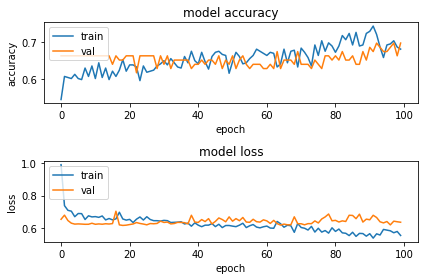

In [5]:
score = model.evaluate(test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

### Verify the predictions being made
---

In [6]:
# Decode predictions didn't seem to work so well when not using
# xception network. This function should decode objects with 2 classes [0,1]
"""

def decoder(one_pred):
    if one_pred[0] > one_pred[1]:
        return np.float32([1,0])
    else:
        return [0,1]

num_items = len(Y)
squat_preds = first_model.predict(X[0:num_items,:,:,:])

decoded = np.apply_along_axis(decoder, 1, squat_preds)

incorrect_squats = []
incorrect_non_squats = []
for i in range(100):
    if np.array_equal(decoded[i],Y[i]) == False:
        if Y[i][0] == 1:
            incorrect_non_squats.append(i)
        elif Y[i][1] == 0:
            incorrect_squats.append(i)

for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
    
# No cats classified incorrectly

for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
"""

'\n\ndef decoder(one_pred):\n    if one_pred[0] > one_pred[1]:\n        return np.float32([1,0])\n    else:\n        return [0,1]\n\nnum_items = len(Y)\nsquat_preds = first_model.predict(X[0:num_items,:,:,:])\n\ndecoded = np.apply_along_axis(decoder, 1, squat_preds)\n\nincorrect_squats = []\nincorrect_non_squats = []\nfor i in range(100):\n    if np.array_equal(decoded[i],Y[i]) == False:\n        if Y[i][0] == 1:\n            incorrect_non_squats.append(i)\n        elif Y[i][1] == 0:\n            incorrect_squats.append(i)\n\nfor i in incorrect_non_squats:\n    plt.imshow(image.array_to_img(X[i,:,:,:])) \n    plt.show()\n    \n# No cats classified incorrectly\n\nfor i in incorrect_non_squats:\n    plt.imshow(image.array_to_img(X[i,:,:,:])) \n    plt.show()\n'